# Alternative and Quantitative Investment Strategies

Grenoble INP - Ensimag

Objectives: 
1. Be familiar with trades data and time series
2. Be comfortable with the main functions of the Pandas Python module
3. Be able to manipulate a dataset and answer functional questions using it

#### Modules

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## 1. Read the data set
Using the proper reading method, read the data set given in the file TP1_trades_data.csv

NB: you may need to set the parameter *low_memory* to *False* to avoid getting a warning.

In [144]:
df = pd.read_csv("TP1_trades_data.csv")

/tmp/ipykernel_153581/3269863201.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TP1_trades_data.csv")


## 2. Inspect the data

Take the time needed to take a first look at the data. Display the first rows, look at the columns etc.

In [145]:
df

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.400000,0.000990,1.0,bnce,btc-usdt
1,2022-10-24 14:54:26.800999936,1730804113.0,19258.080000,0.001000,0.0,bnce,btc-usdt
2,2022-10-24 14:54:26.804999936,1730804114.0,19257.760000,0.070000,1.0,bnce,btc-usdt
3,2022-10-24 14:54:26.809999872,1730804115.0,19257.760000,0.093500,1.0,bnce,btc-usdt
4,2022-10-24 14:54:26.820000000,1730804116.0,19257.760000,0.100000,1.0,bnce,btc-usdt
...,...,...,...,...,...,...,...
942079,2022-10-24 15:48:35.000000000,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0xf...,0.999894,10001.055765,1.0,usp3,usdc-usdt
942080,2022-10-24 15:57:47.000000000,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf-0xb...,1.000079,658.466112,0.0,usp3,usdc-usdt
942081,2022-10-24 14:21:11.000000000,0x11b815efb8f581194ae79006d24e0d814b7697f6-0x0...,1330.023922,57.097477,1.0,usp3,weth-usdt
942082,2022-10-24 15:31:59.000000000,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf-0x2...,1.000059,24993.533687,0.0,usp3,usdc-usdt


Start inspecting the data by answering to the following questions:
- How many rows and columns are there in the data set?

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942084 entries, 0 to 942083
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        942084 non-null  object 
 1   trade_id         942084 non-null  object 
 2   price            942076 non-null  float64
 3   amount           942079 non-null  float64
 4   taker_side_sell  942084 non-null  float64
 5   exchange         942084 non-null  object 
 6   pair             942084 non-null  object 
dtypes: float64(3), object(4)
memory usage: 50.3+ MB



- What does each column represent? What is its type supposed to be? Does it match the type in the dataset? Modify the dataframe so that all columns have the appropriate type.

Useful methods: *astype*, *to_datetime*, etc. 

In [147]:
df.timestamp = pd.to_datetime(df.timestamp)
df.rename(columns={'timestamp':'Date'}, inplace=True)
df.set_index('Date', inplace=True)
df.taker_side_sell = df.taker_side_sell.map({1.0:"Sell",0.0:"Buy"})

df

,Date,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.400000,0.000990,Sell,bnce,btc-usdt
1,2022-10-24 14:54:26.800999936,1730804113.0,19258.080000,0.001000,Buy,bnce,btc-usdt
2,2022-10-24 14:54:26.804999936,1730804114.0,19257.760000,0.070000,Sell,bnce,btc-usdt
3,2022-10-24 14:54:26.809999872,1730804115.0,19257.760000,0.093500,Sell,bnce,btc-usdt
4,2022-10-24 14:54:26.820000000,1730804116.0,19257.760000,0.100000,Sell,bnce,btc-usdt
...,...,...,...,...,...,...,...
942079,2022-10-24 15:48:35.000000000,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0xf...,0.999894,10001.055765,Sell,usp3,usdc-usdt
942080,2022-10-24 15:57:47.000000000,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf-0xb...,1.000079,658.466112,Buy,usp3,usdc-usdt
942081,2022-10-24 14:21:11.000000000,0x11b815efb8f581194ae79006d24e0d814b7697f6-0x0...,1330.023922,57.097477,Sell,usp3,weth-usdt
942082,2022-10-24 15:31:59.000000000,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf-0x2...,1.000059,24993.533687,Buy,usp3,usdc-usdt


Update the dataframe so that the data is sorted over time.

In [148]:
df.sort_values("Date",inplace=True)

df

,Date,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.40,0.00099,Sell,bnce,btc-usdt
256001,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,Sell,bnce,btc-usdt
621206,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,Sell,bnce,btc-usdt
621205,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,Sell,bnce,btc-usdt
621261,2022-10-24 14:00:00.001999872,1730418311.0,19352.40,0.00067,Sell,bnce,btc-usdt
...,...,...,...,...,...,...,...
256036,2022-10-24 15:59:59.992999936,1731052744.0,19302.52,0.00111,Buy,bnce,btc-usdt
256037,2022-10-24 15:59:59.995000064,1731052745.0,19302.52,0.00059,Buy,bnce,btc-usdt
256038,2022-10-24 15:59:59.996000000,1731052746.0,19302.52,0.00376,Buy,bnce,btc-usdt
256018,2022-10-24 15:59:59.998000128,1731052747.0,19301.96,0.00239,Sell,bnce,btc-usdt


Search if there are any missing prices in the dataset and get rid of the corresponding rows if necessary.

Useful method: *dropna*

In [149]:
df.dropna(subset="price", inplace=True)

df

,Date,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.40,0.00099,Sell,bnce,btc-usdt
256001,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,Sell,bnce,btc-usdt
621206,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,Sell,bnce,btc-usdt
621205,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,Sell,bnce,btc-usdt
621261,2022-10-24 14:00:00.001999872,1730418311.0,19352.40,0.00067,Sell,bnce,btc-usdt
...,...,...,...,...,...,...,...
256036,2022-10-24 15:59:59.992999936,1731052744.0,19302.52,0.00111,Buy,bnce,btc-usdt
256037,2022-10-24 15:59:59.995000064,1731052745.0,19302.52,0.00059,Buy,bnce,btc-usdt
256038,2022-10-24 15:59:59.996000000,1731052746.0,19302.52,0.00376,Buy,bnce,btc-usdt
256018,2022-10-24 15:59:59.998000128,1731052747.0,19301.96,0.00239,Sell,bnce,btc-usdt


Update the dataset if necessary to ensure that every trade admits a strictly positive price by getting rid of the non-consistent rows if necessary.

In [150]:
rows = df[df.price <= 0]
rows
# df.drop(rows, inplace=True)

# df    

,Date,trade_id,price,amount,taker_side_sell,exchange,pair


Repeat the operations above to make sure all the rows in the dataset also have strictly positive (hence nonempty) amounts.

In [151]:
rows = df[df.amount <= 0]
rows

,Date,trade_id,price,amount,taker_side_sell,exchange,pair


Make sure that the *trade_id* is unique per each trade. If not, verify that duplicate trade identifiers correspond to identical trades. Then correct the dataset so that each trade is unique.

Useful methods: *value_counts*, *drop_duplicates*

In [152]:
df.trade_id.is_unique

df.drop_duplicates("trade_id", inplace=True)

df

,Date,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.40,0.00099,Sell,bnce,btc-usdt
256001,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,Sell,bnce,btc-usdt
621206,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,Sell,bnce,btc-usdt
621261,2022-10-24 14:00:00.001999872,1730418311.0,19352.40,0.00067,Sell,bnce,btc-usdt
621260,2022-10-24 14:00:00.001999872,1730418310.0,19352.40,0.00455,Sell,bnce,btc-usdt
...,...,...,...,...,...,...,...
256036,2022-10-24 15:59:59.992999936,1731052744.0,19302.52,0.00111,Buy,bnce,btc-usdt
256037,2022-10-24 15:59:59.995000064,1731052745.0,19302.52,0.00059,Buy,bnce,btc-usdt
256038,2022-10-24 15:59:59.996000000,1731052746.0,19302.52,0.00376,Buy,bnce,btc-usdt
256018,2022-10-24 15:59:59.998000128,1731052747.0,19301.96,0.00239,Sell,bnce,btc-usdt


At this stage, you should be confident that:
- each column has consistent values and has a proper type
- you don't have any duplicates or missing data
- you don't have financially inconsistent data

## 3. Explore the data

### First explorations

Answer the following questions:
- How many distinct pairs are there in the dataset?
- How many distinct exchanges are there? Get the list of the exchanges' codes
- How many distinct instruments are there in the dataset? Recall an instrument represents a pair on an exchange.
- What pair admits the highest number of trades? What pairs admit the least number of trades?
- Are there more trades initiated by buyers or by sellers?
- What are the five trades with the largest amounts?
- What are the 10 smallest distinct traded prices?

Useful methods: *unique*, *nunique*, *value_counts*, *nsmallest*, etc.

In [153]:
print(len(df.pair.unique()))
print(len(df.exchange.unique()))
print(df.exchange.unique())
print(len(df[['pair', 'exchange']].value_counts()))

17
12
['bnce' 'huob' 'ftxx' 'cbse' 'stmp' 'itbi' 'gmni' 'usp3' 'btrx' 'cexi'
 'crv2' 'usp2']
68


In [154]:
print(df.groupby('pair').trade_id.count())

pair
ada-usdt       6671
adx-usdt        373
btc-dai         557
btc-usd       99057
btc-usdt     648750
dai-usdc         28
dai-usdt         77
eth-usd       90367
flow-usdt     24882
hex-usdc         98
sol-usd       22996
trx-usdt       6786
usdc-usdt      4438
usdt-usd      17783
wbtc-usdc        28
weth-usdt       548
xrp-usdt      18618
Name: trade_id, dtype: int64


In [155]:
print(df.groupby('taker_side_sell').trade_id.count())

taker_side_sell
Buy     463442
Sell    478615
Name: trade_id, dtype: int64


### Focus on the pair BTC-USDT

Create another dataset containing only the trades on the pair BTC-USDT.

In [156]:
ds = df[df.pair == "btc-usdt"]

ds

,Date,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.40,0.00099,Sell,bnce,btc-usdt
256001,2022-10-24 14:00:00.000999936,1730418309.0,19352.40,0.00077,Sell,bnce,btc-usdt
621206,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,Sell,bnce,btc-usdt
621261,2022-10-24 14:00:00.001999872,1730418311.0,19352.40,0.00067,Sell,bnce,btc-usdt
621260,2022-10-24 14:00:00.001999872,1730418310.0,19352.40,0.00455,Sell,bnce,btc-usdt
...,...,...,...,...,...,...,...
256036,2022-10-24 15:59:59.992999936,1731052744.0,19302.52,0.00111,Buy,bnce,btc-usdt
256037,2022-10-24 15:59:59.995000064,1731052745.0,19302.52,0.00059,Buy,bnce,btc-usdt
256038,2022-10-24 15:59:59.996000000,1731052746.0,19302.52,0.00376,Buy,bnce,btc-usdt
256018,2022-10-24 15:59:59.998000128,1731052747.0,19301.96,0.00239,Sell,bnce,btc-usdt


- Perform a statistical analysis of the prices. 
- Plot the distribution of the prices.
- Plot the box plot of the prices, what do you observe?
- Extract the prices that deviate significantly from the average (i.e. at least 3 times from the standard deviation). 

Useful methods: *describe*, any standard statistical methods (*min*, *max*, *mean* etc.), any plotting methods (*plot*, *hist*). 

              price        amount
count  6.487500e+05  6.487460e+05
mean   1.933463e+04  5.836145e-02
std    4.338580e+04  2.809994e-01
min    1.932540e+02  1.000000e-08
25%    1.923340e+04  3.450000e-03
50%    1.926390e+04  1.145000e-02
75%    1.928211e+04  4.709000e-02
max    2.922541e+07  1.257620e+02


<AxesSubplot:>

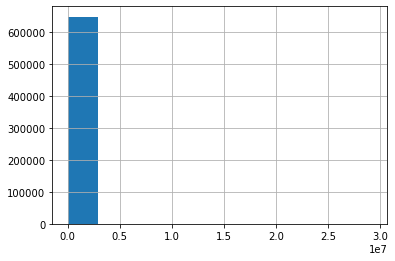

In [157]:
print(ds.describe())

ds.price.hist()

What do you notice? Get rid of the outlier prices. Resume your price study if necessary.

Warning: Also propagate the changes made on the filtered dataset to the global one.

NB: There are no significant outliers for the other pairs. There is no need to perform a similar analysis on them.

Useful method: *drop*

               price        amount
count  648747.000000  6.487430e+05
mean    19259.766512  5.836168e-02
std        44.460300  2.810000e-01
min       193.254000  1.000000e-08
25%     19233.400000  3.450000e-03
50%     19263.900000  1.145000e-02
75%     19282.110000  4.709000e-02
max     19356.560000  1.257620e+02


<AxesSubplot:>

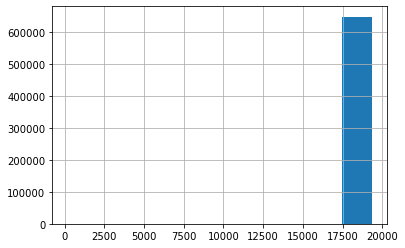

In [158]:
mean = ds.price.mean()
std = ds.price.std()

ds = ds[ds.price.between(mean-3*std, mean+3*std)]

print(ds.describe())

ds.price.hist()

Perform the same analysis for the amounts. What can you conclude? 

<AxesSubplot:>

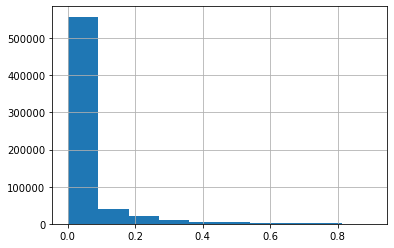

In [159]:
mean = ds.amount.mean()
std = ds.amount.std()

ds = ds[ds.amount.between(mean-3*std, mean+3*std)]

ds.amount.hist()

Display the evolution of the BTC-USDT price over time.

,price,amount
count,644973.000000,6.449730e+05
mean,19259.777894,4.801800e-02
std,44.496488,9.835928e-02
min,193.254000,1.000000e-08
25%,19233.420000,3.360000e-03
50%,19263.910000,1.112000e-02
75%,19282.120000,4.555000e-02
max,19356.560000,9.013000e-01


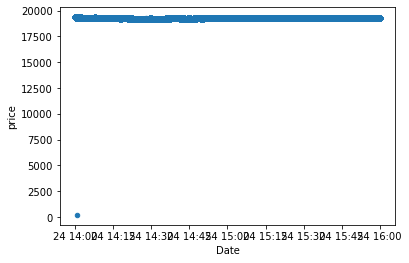

In [160]:
ds.plot.scatter(x="Date", y="price")
ds.describe()

Display in a scatter plot the amounts as a function of the exchange code. What can you conclude?

## End of the practical session
Save your global dataset in a new CSV file. 